In [ ]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### **Завдання 16**  (3 бали)

Керівництво магазину хоче перевірити чи новий банер на вітрині повпливає на те, чи люди будуть частіше заходити у їх магазин. Проконсультуйте керівництво.
1. Які метрики потрібно міряти під час експерименту?
2. Як досягти незалежності двох груп між собою та від інших факторів? 
3. Сформулюйте фінальне рішення - проводити чи не проводити експеримент і кроки експерименту.

В усіх пунктах я відштовхуюсь від припущення, що експеримент проводиться в одному магазині, а не, наприклад, мережі.

1. - загальна кількість унікальних відвідувань (Припускаю, що банер буде найбільше впливати лише під час першого відвідування кожної людини після його появи. Всі подальші рази на рішення тих самих людей відвідати магазин будуть більше впливати інші фактори);
   - середня кількість відвідувань у день (середнє арифметичне);
   - частка нових клієнтів в загальній кількості відвідувачів (Чи новий банер краще привертає увагу серед ширших верств населення);
   - яка частка відвідувань закінчується покупкою (порівняти обидві групи. Наприклад, банер може привертати увагу, але бути misleading і люди будуть розчаровані тим, що не отримали очікуване)

2.  Дослідження має проводитись за однаковий період часу, упродовж якого в магазині не має бути змін в асортименті та ціні товарів, нових акцій. Тривалість напевно має бути невелика, тиждень/два, оскільки по перше місцеві жителі які бувають у районі встигнуть ознайомитись з новим банером, по друге, менша вірогідність появи сторонніх факторів  населеному пункті. Окрім цього потрібно врахувати фактори надзвичайних ситуацій, оскільки такий експеримент не спрацює, якщо у населення різко зміняться потреби чи можливості, або ж у місті буде багато переселенців.

3. Якщо на підготовчому етапі ми визначили, що суттєвих сторонніх впливів на час експерименту немає, то його можна проводити.
  - Етап підготовки: визначаємо мету, метрики, способи оцінювання, розмір вибірки та час, необхідний на проведення експерименту. 
   - Етап реалізації: проводимо оцінювання відвідування із старим банером, далі оцінюється ті самі показники після появи нового.
   - Етап аналізу: зібрані дані обраховуються та візуалізуються;
   - Етап висновків: результати презентуються та обговорюються із власником магазину.

### **Завдання 17**  (10 бали)

1. (5 балів) Компанія хоче оновити сайт перегляду фільмів. Оновлення зробить сайт в рази швидшим. Керівництво припускає, що це оновлення вплине на купівлю послуг компанії (підписку). Зараз частка людей, які оформлюють підписку з тих, хто взагалі заходить на сайт = 43%. Проте оновлення буде потребувати додаткових вкладень у сервери, тому було вибрано межу +5% з якої зміна буде вигідна. Ви обговорили параметри для тесту і вирішили, що alpha = 3%, а beta = 10% (power = 90%). Скільки даних потрібно зібрати для експерименту?

2. (5 балів) Експеримент був проведений. Проведіть тест. Прокоментуйте вибір тесту та його результат. Чи рекомендуєте вводити оновлення на всю систему? Дані зберігаються у датасеті:

```
df = pd.read_csv('https://github.com/NataliaNovosad/Datasets/blob/master/ABtest_movies.csv?raw=true')
```
Колонки: 

- user_id - ідентифікаток користувача
- group - група - control/test
- sign - мітка підписки - 1(підписка)/0(не підписка)


#### 1

In [ ]:
df = pd.read_csv('https://github.com/NataliaNovosad/Datasets/blob/master/ABtest_movies.csv?raw=true')

In [ ]:
data_control = df.loc[df.group == 'control', 'sign']
data_test = df.loc[df.group == 'test', 'sign']

Я не до кінця зрозуміла чи можна порахувати розмір вибірки до проведення експерименту, коли у нас немає даних про середні значення. Тому я використала формулу з лекції. На сайті https://www.evanmiller.org/ розмір вибірки складає 2,344. За цією ж формулою вона складає 1288

In [ ]:
from statsmodels.stats.power import zt_ind_solve_power
alpha = 0.03
power = 0.9
zt_ind_solve_power(effect_size = (data_test.mean() - data_control.mean())/np.sqrt(data_test.var()/2 + data_control.var()/2),
                   nobs1 = None, 
                   alpha = alpha, 
                   power = power,
                   ratio = 1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1288.6443517405726

Також в пошуках того як порахувати вибірку лише з тими параметрами які надані у пункті 1 я використала формулу з цього посту https://stackoverflow.com/questions/25657476/r-or-python-is-it-possible-to-get-the-necessary-sample-size-in-a-proportions-po (тут питання трохи про інше), результат якої виявився ближче до 2,344. Наскільки я зрозуміла p1 і p2 це пропорції конверсії в контрольній та тестовій групі, за якими розраховуються effect size

In [ ]:
alpha = 0.03
power = 0.9
p1 = 0.43
p2 = 0.48

In [ ]:
import statsmodels.stats.api as sm
es = sm.proportion_effectsize(p1, p2)
sm.NormalIndPower().solve_power(es, power=power, alpha=alpha)

2361.430529164826

#### 2

In [ ]:
print(len(data_control))
print(len(data_test))

2945
2987


In [ ]:
ztest?

In [ ]:
from statsmodels.stats.weightstats import ztest

ztest(data_test, data_control, alternative = 'larger')


(5.23621680454302, 8.195070633553258e-08)

0.03970864793495799 0.09557412523661801


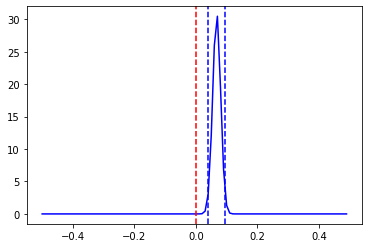

In [ ]:
n = len(data_test)
t1, t2 = st.norm.interval(1-alpha, loc = data_test.mean() - data_control.mean(), scale = np.sqrt(data_test.var()/n + data_control.var()/n))
print(t1, t2)

x = [i/100 for i in range(-50,50,1)]
density_values_norm = st.norm.pdf(x, loc = data_test.mean() - data_control.mean(), scale = np.sqrt(data_test.var()/n + data_control.var()/n))
plt.plot(x, density_values_norm, c = "b", label = "test")
plt.axvline(t1, c = "b", ls = "--")
plt.axvline(t2, c = "b", ls = "--")
plt.axvline(0, c = "r", ls = "--")

plt.show()

Для аналізу результатів експерименту я використала one sample z test, оскільки ми перевіряємо чи матиме позитивний вплив введення оновлення на вибірку (хоча з two sided він теж проходить). Тест показав, що p-value є дуже маленьким, що свідчить про суттєві відмінності у вибірках після оновлення сайту. На графіку видно, що встановлені інтервали довіри перевищують 0, а значить різниця між розподілами у контрольній і  тестовій вибірках є статистично значущою. Можна відкинути нульову гіпотезу та стверджувати, що частка людей, які будуть оформлювати підписку збільшиться.

In [ ]:
from statsmodels.stats.power import zt_ind_solve_power, tt_ind_solve_power

alpha = 0.03
n = len(data_test)
zt_ind_solve_power(effect_size = (data_test.mean() - data_control.mean())/np.sqrt(data_test.var()/2 + data_control.var()/2),
                   nobs1 = n, 
                   alpha = alpha, 
                   power = None,
                   ratio = 1)

0.9989820990849836

### **Завдання 18**  (5 бали)

Зробіть ANOVA аналіз для неперервної змінної LotArea залежно від категорій MSZoning. Прокоментуйте отримані результати. 

In [ ]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
data = housing.data[["LotArea", "MSZoning"]]
data.head(5)

,LotArea,MSZoning
0,8450.0,RL
1,9600.0,RL
2,11250.0,RL
3,9550.0,RL
4,14260.0,RL


In [ ]:
data.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [ ]:
data_rl = data.loc[data.MSZoning == 'RL', 'LotArea']
data_rm = data.loc[data.MSZoning == 'RM', 'LotArea']
data_fv = data.loc[data.MSZoning == 'FV', 'LotArea']
data_rh = data.loc[data.MSZoning == 'RH', 'LotArea']
data_c = data.loc[data.MSZoning == 'C (all)', 'LotArea']

Я використала one-way ANOVA оскільки ми перевіряємо одну категоріальну змінну. P-value у тесті є дуже маленьким, міжгрупова варіація сильно відрізняється від різниці у групах. Тому можна відкинути нульову гіпотезу і стверджувати, що залежність між категорією MSZoning і LotArea існує

In [ ]:
from scipy.stats import f_oneway

f_oneway(data_rl, data_rm, data_fv, data_rh, data_c)

F_onewayResult(statistic=16.09067048733613, pvalue=6.711089624235668e-13)

Цей самий результат дає і лінійна регресія

In [ ]:
from statsmodels.formula.api import ols

lm = ols('LotArea	 ~ C(MSZoning) -1', data=data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                LotArea   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     16.09
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           6.71e-13
Time:                        12:53:46   Log-Likelihood:                -15484.
No. Observations:                1460   AIC:                         3.098e+04
Df Residuals:                    1455   BIC:                         3.100e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
C(MSZoning)[C (all)]  9501.3000 

### **Завдання 19**  (10 бали)

Компанія володіє двома фабриками по виготовленню певного товару. Якість товару вони міряють за допомогою певного показника (наприклад ваги). Нещодавно керівництво купило новий станок по виготовленню товару і поставили його на одній з фабрик. Продавець гарантував, що показник якості товару виготовленого за допомогою цього станка сягне більше 150. Компанія збирала дані показника з двох фабрик і отримала наступні числа (одне число - показник одного товару):

```
old = np.array([123,134,125,146,151,148,157,123,132,129,145,132])
new = np.array([143,144,129,136,155,139,147,163,152,139,159])
```

Зробіть наступні 3 тести:
1. Керівництво очікує, що кількість товарів на першій і на другій фабриці залишиться одинаковим. Проведіть chi2 тест
2. Чи здійснились гарантії продавця? Чи справді новий показник в середньому перевищує 150?
3. Чи показник на новій фабриці реально вищий ніж на старій?


Напишіть висновок. Чи рекомендуєте ви купити такий самий станок і на другу фабрику?

In [ ]:
old = np.array([123,134,125,146,151,148,157,123,132,129,145,132])
new = np.array([143,144,129,136,155,139,147,163,152,139,159])

Я не до кінця зрозуміла мету 1 завдання. Якщо одне число це показник якості одного товару, то у другій фабриці просто на один товар менше. Як саме тест хі-квадрат може відповісти на нього? Перевірити чи рівні розподіли у цих двох вибірках ми теж не можемо, оскільки тест вимагає, щоб вони були однакової довжини. Я усе ж вирішила його зробити, додавши усереднене значення, але думаю, що це напевно не найбільш оптимальне рішення.

In [2]:
from scipy.stats import chisquare
chisquare([11, 12])

Power_divergenceResult(statistic=0.043478260869565216, pvalue=0.8348273291852392)

In [ ]:
from scipy.stats import chisquare
new_mod = np.insert(new, 0, values=np.mean(new), axis=0)
chisquare(f_obs = new_mod, f_exp = old)

Power_divergenceResult(statistic=35.49259243679348, pvalue=0.0002054434800818075)

In [ ]:
from scipy.stats import ttest_1samp

ttest_1samp(new, 150)

Ttest_1sampResult(statistic=-1.2789400816074252, pvalue=0.22979916182959537)

In [ ]:
from scipy.stats import ttest_ind

ttest_ind(new, old)

Ttest_indResult(statistic=1.920906471970677, pvalue=0.06842382228815087)

Загалом, за результатами тестів новий станок не виглядає особливо корисним придбанням. Середнє значення якості товарів дещо підвищилось, але так і не перевищило очікуваний показник. Тому можемо стверджувати, що гарантії продавця не підтвердились. Також ми не повністю можемо відкинути нульову гіпотезу про те, що вибірки суттєво відрізняються між собою, оскільки p-value t-тестування недостатньо мале.
Деяка різниця між розподілами все ж спостерігається, але оскільки підвищення якості не відповідає поставленим цілям, а також зважаючи на зменшення кількості товарів, я би не рекомендувала купувати другий станок.